## Part 3: Joining Data

This notebook makes use of dataframes created in Parts 1 and 2. The dataframes from Part 2 combine city_bikes bike station data with FourSquare and Yelp POI data.

In [1]:
# import required libraries
import pandas as pd
import os # use this to access environment variables
import json

# the city_bikes.ipnb notebook created a CSV for it's output, and this is read into a dataframe here
city_bikes_df = pd.read_csv('../data/city_bikes.csv')
city_bikes_df.head()

id  \
0  066c99293af108ece27d9b0436c30cc4   
1  0a106cbc148d5a0c2535b51c1dbe3b4d   
2  0cc8c09950e1435ee7782478ed292fef   
3  0e94d2ad012bff0cf23497963ff5fd77   
4  101c6cd7749f373507e9444f5222b7f2   

                                          name   latitude  longitude  \
0                             Riverside Museum  55.865683  -4.305367   
1                                     Parkhead  55.846524  -4.197475   
2      Tollcross International Swimming Centre  55.844250  -4.176167   
3                                 Shields Road  55.845807  -4.275232   
4  Shawlands Shopping Centre (Kilmarnock Road)  55.829057  -4.282675   

                           timestamp  free_bikes  empty_slots  extra.uid  \
0  2025-07-01T19:18:19.376003+00:00Z          11            0   19738176   
1  2025-07-01T19:18:19.377604+00:00Z           6            0  150125231   
2  2025-07-01T19:18:19.376951+00:00Z           6            0   55599921   
3  2025-07-01T19:18:19.375677+00:00Z           1            7    7145152   
4  2025-07-01T19:18:19.375152+00:00Z           1            6    3812605   

   extra.number  extra.slots  \
0          8416            6   
1          8470            8   
2          8200            6   
3          8403            8   
4          8453            8   

                                     extra.bike_uids  extra.virtual  
0  ['47041', '823506', '46976', '46961', '46910',...          False  
1  ['82316', '840047', '46722', '46457', '47968',...          False  
2  ['828253', '46967', '823632', '828964', '82360...          False  
3                                          ['46992']          False  
4                                          ['46830']          False

In [2]:
# Load the FourSquare POI dataframe from a CSV file and inspect.
fs_df = pd.read_csv('../data/foursquare_poi_data.csv')
fs_df.head()

fsq_category_id            name      short_name      plural_name  \
0  4bf58dd8d48988d181941735          Museum          Museum          Museums   
1  4bf58dd8d48988d190941735  History Museum  History Museum  History Museums   
2  4bf58dd8d48988d16d941735            Café            Café            Cafés   
3  4bf58dd8d48988d1e2931735     Art Gallery     Art Gallery    Art Galleries   
4  4bf58dd8d48988d1e5931735     Music Venue     Music Venue     Music Venues   

                                         icon.prefix icon.suffix  \
0  https://ss3.4sqi.net/img/categories_v2/arts_en...        .png   
1  https://ss3.4sqi.net/img/categories_v2/arts_en...        .png   
2  https://ss3.4sqi.net/img/categories_v2/food/cafe_        .png   
3  https://ss3.4sqi.net/img/categories_v2/arts_en...        .png   
4  https://ss3.4sqi.net/img/categories_v2/arts_en...        .png   

               fsq_place_id   latitude  longitude  distance  \
0  4c8a3ba4a92fa093be438fbf  55.865392  -4.306417        73   
1  4c8a3ba4a92fa093be438fbf  55.865392  -4.306417        73   
2  4eaaa5f477c850207ed9fee8  55.865610  -4.305612        17   
3  4b86d7fcf964a52018a131e3  55.864562  -4.299637       378   
4  4b86d7fcf964a52018a131e3  55.864562  -4.299637       378   

                        email                              link  \
0  museums@glasgowlife.org.uk  /places/4c8a3ba4a92fa093be438fbf   
1  museums@glasgowlife.org.uk  /places/4c8a3ba4a92fa093be438fbf   
2                         NaN  /places/4eaaa5f477c850207ed9fee8   
3                work@swg3.tv  /places/4b86d7fcf964a52018a131e3   
4                work@swg3.tv  /places/4b86d7fcf964a52018a131e3   

   location.address location.locality   bike_lat  bike_lon  \
0   Glasgow Harbour           Glasgow  55.865683 -4.305367   
1   Glasgow Harbour           Glasgow  55.865683 -4.305367   
2  Riverside Museum           Glasgow  55.865683 -4.305367   
3  100 Eastvale Pl.           Glasgow  55.865683 -4.305367   
4  100 Eastvale Pl.           Glasgow  55.865683 -4.305367   

                            bike_id  free_bikes  
0  066c99293af108ece27d9b0436c30cc4          11  
1  066c99293af108ece27d9b0436c30cc4          11  
2  066c99293af108ece27d9b0436c30cc4          11  
3  066c99293af108ece27d9b0436c30cc4          11  
4  066c99293af108ece27d9b0436c30cc4          11

In [4]:
# Load the Yelp POI dataframe from a CSV file and inspect.
yelp_df = pd.read_csv('../data/yelp_poi_data.csv')
yelp_df.head()

category_alias      category_title                 yelp_id  \
0  tapasmallplates  Tapas/Small Plates  _GHNOOJhhjLegiCvzf5V0Q   
1         scottish            Scottish  _GHNOOJhhjLegiCvzf5V0Q   
2          british             British  jGLzc9eIUAnfto_5oZ8BMQ   
3             bars                Bars  rmaH1My396rCYEnL8XQtPg   
4         scottish            Scottish  rmaH1My396rCYEnL8XQtPg   

              yelp_name  yelp_rating  yelp_coordinates.latitude  \
0          Ox And Finch          4.7                  55.865654   
1          Ox And Finch          4.7                  55.865654   
2  Number 16 Restaurant          4.6                  55.870810   
3       Ubiquitous Chip          4.3                  55.874915   
4       Ubiquitous Chip          4.3                  55.874915   

   yelp_coordinates.longitude  yelp_location.address1 yelp_location.city  \
0                   -4.284692  920 Sauchiehall Street            Glasgow   
1                   -4.284692  920 Sauchiehall Street            Glasgow   
2                   -4.298839           16 Byres Road            Glasgow   
3                   -4.293247        8-12 Ashton Lane            Glasgow   
4                   -4.293247        8-12 Ashton Lane            Glasgow   

   yelp_distance   bike_lat  bike_lon                           bike_id  \
0    1290.029875  55.865683 -4.305367  066c99293af108ece27d9b0436c30cc4   
1    1290.029875  55.865683 -4.305367  066c99293af108ece27d9b0436c30cc4   
2     700.694335  55.865683 -4.305367  066c99293af108ece27d9b0436c30cc4   
3    1274.920333  55.865683 -4.305367  066c99293af108ece27d9b0436c30cc4   
4    1274.920333  55.865683 -4.305367  066c99293af108ece27d9b0436c30cc4   

   free_bikes  
0          11  
1          11  
2          11  
3          11  
4          11

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

The POI dataframes produced in Part 2 contain bike_station date retrieved in Part 1, i.e.:
- Bike Station ID
- Number of free bikes
- Bike Station latitude and longitude

I will focus on the Yelp data for visualization and regression modelling because it contains richer data than FourSquare, especially place ratings.

In [12]:
# Import packages required for visualizations
import pandas as pd
import numpy as np

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# suppress minor warnings from seaborn
# import warnings
# warnings.filterwarnings('ignore')

### Yelp EDA and visualizations

In [13]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4164 entries, 0 to 4163
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   category_alias              4164 non-null   object 
 1   category_title              4164 non-null   object 
 2   yelp_id                     4164 non-null   object 
 3   yelp_name                   4164 non-null   object 
 4   yelp_rating                 4164 non-null   float64
 5   yelp_coordinates.latitude   4164 non-null   float64
 6   yelp_coordinates.longitude  4164 non-null   float64
 7   yelp_location.address1      4153 non-null   object 
 8   yelp_location.city          4164 non-null   object 
 9   yelp_distance               4164 non-null   float64
 10  bike_lat                    4164 non-null   float64
 11  bike_lon                    4164 non-null   float64
 12  bike_id                     4164 non-null   object 
 13  free_bikes                  4164 

The above dataframe info shows there's only one column with null value cells. This is the Yelp location address, which won't be used in the analysis.

In [14]:
yelp_df.describe()

yelp_rating  yelp_coordinates.latitude  yelp_coordinates.longitude  \
count  4164.000000                4164.000000                 4164.000000   
mean      4.217819                  55.859418                   -4.264837   
std       0.498944                   0.013591                    0.031118   
min       1.000000                  55.810095                   -4.378578   
25%       4.000000                  55.857906                   -4.283616   
50%       4.300000                  55.861269                   -4.260933   
75%       4.500000                  55.865512                   -4.250605   
max       5.000000                  55.908327                   -4.112014   

       yelp_distance     bike_lat     bike_lon   free_bikes  
count    4164.000000  4164.000000  4164.000000  4164.000000  
mean      922.233983    55.858293    -4.263631     3.304515  
std       556.601803     0.015068     0.034318     2.960054  
min         5.065956    55.817338    -4.354877     0.000000  
25%       372.006855    55.849450    -4.285022     1.000000  
50%       959.917840    55.858500    -4.262688     2.000000  
75%      1393.790490    55.865683    -4.246661     5.000000  
max      2115.120001    55.895974    -4.135251    17.000000

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

The follow cell creates a pair plot to visualize through scatterplots the relationship between columns in the Yelp dataframe. 

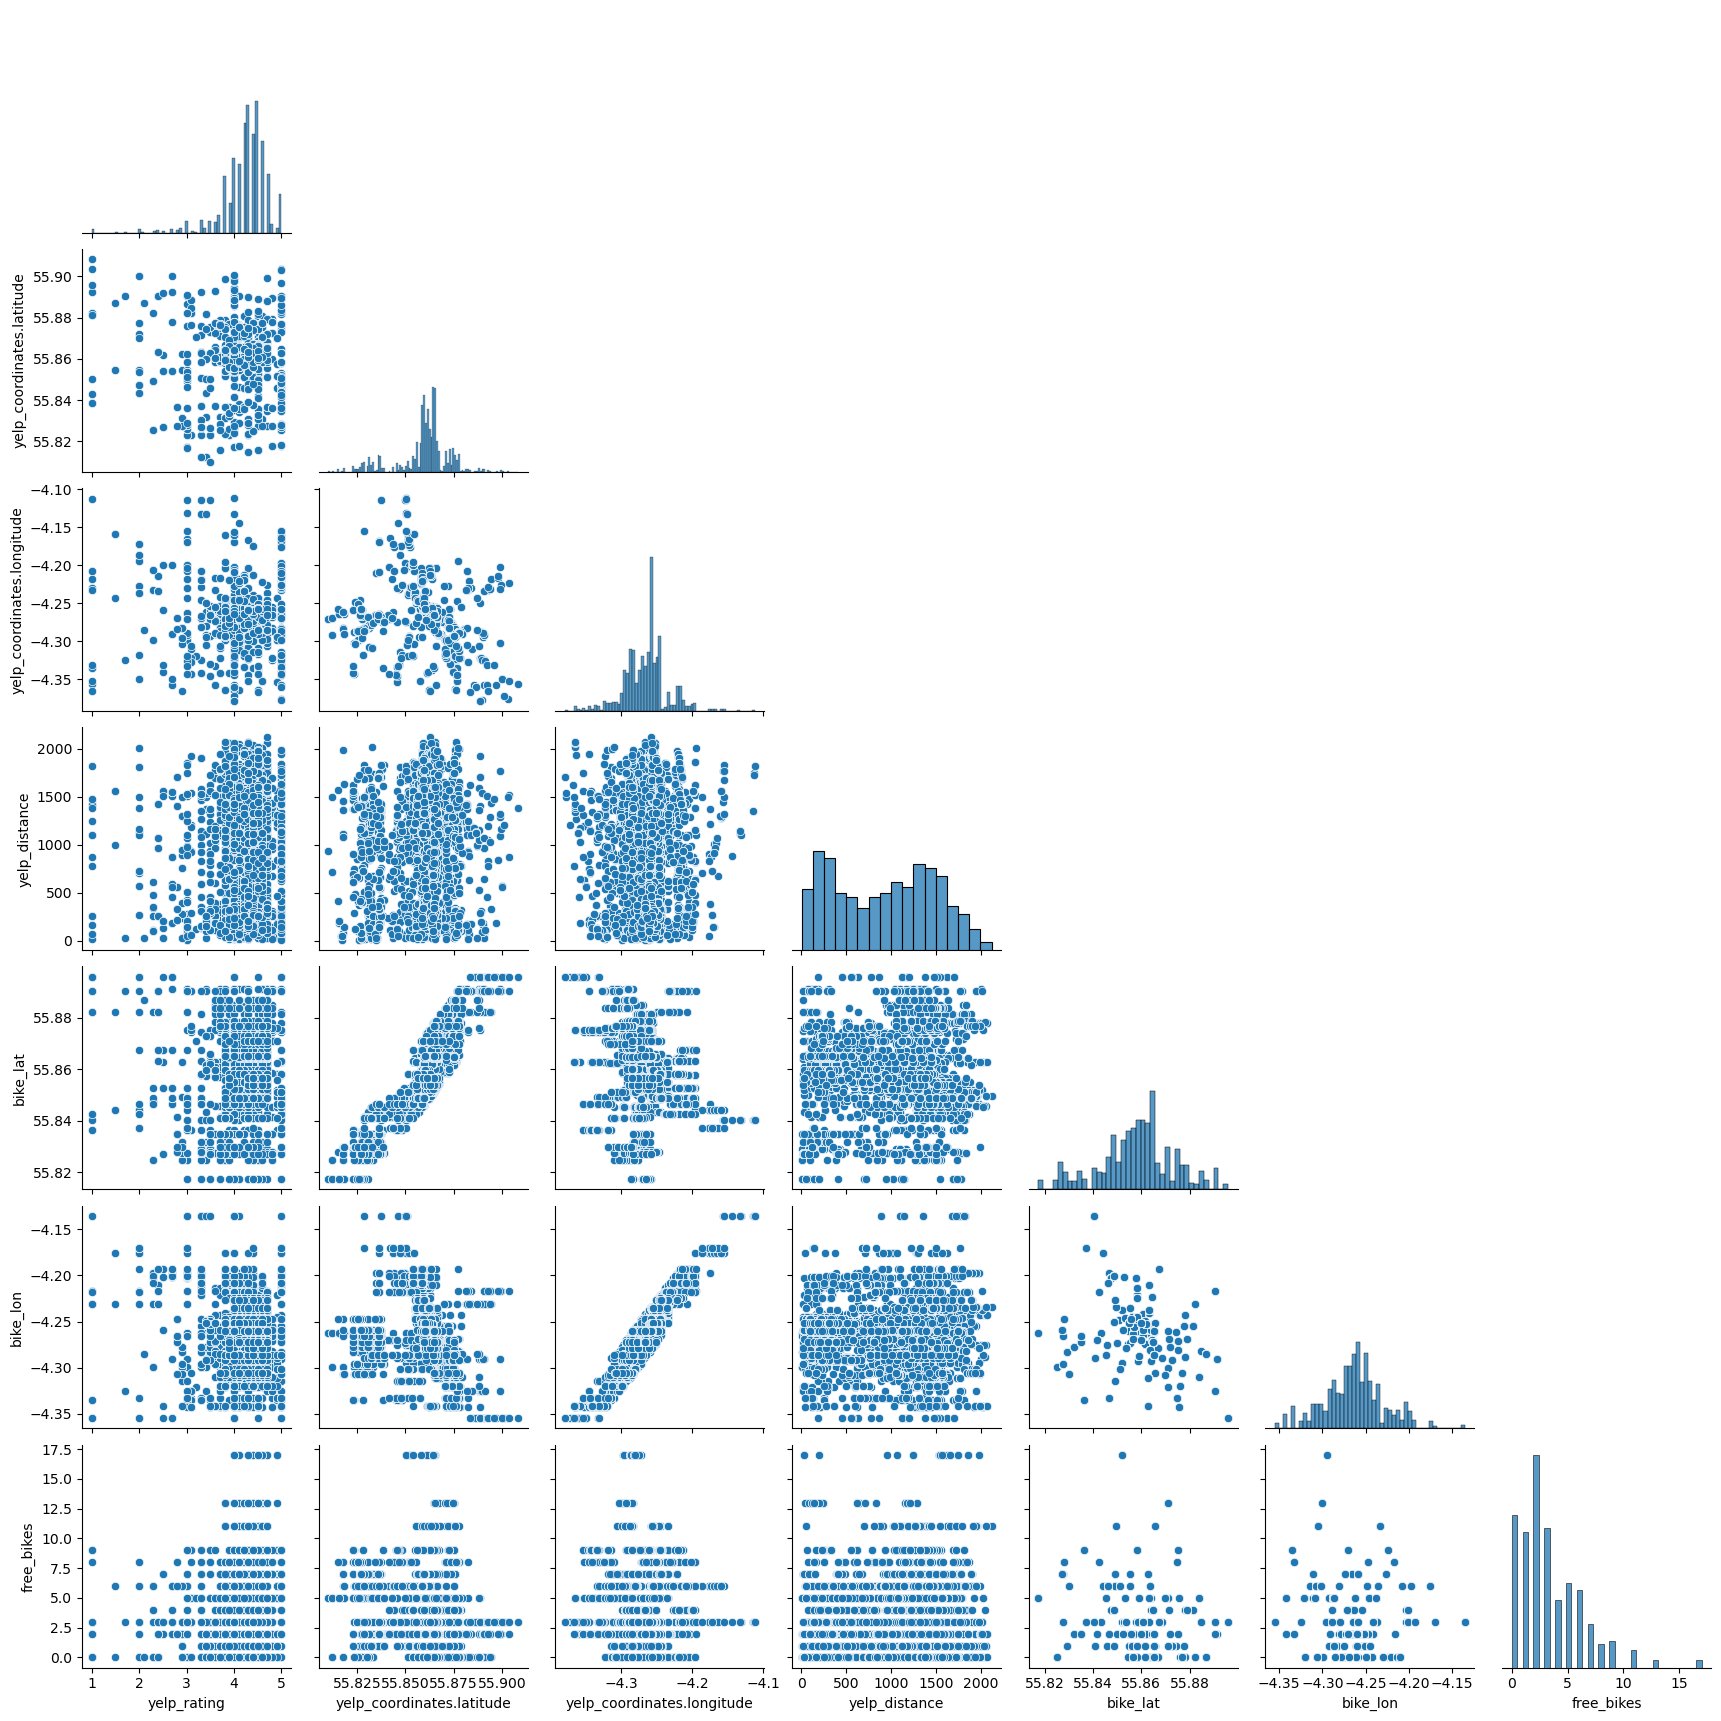

In [7]:
sns.pairplot(yelp_df, corner=True)

plt.show()

It is hard to see any strong relationships between the quantitive data columns. Most distributions are roughly normal, with a few notable exceptions. Free bikes is positively skewed. Yelp rating is negatively skewed. Yelp distance from bike station to POI is almost equally distributed and slightly bimodal. 

The following cell plots a heatmap for the numeric columns in the Yelp dataframe. It doesn't show any strong correlations between, eg location or distance and POI ratings.

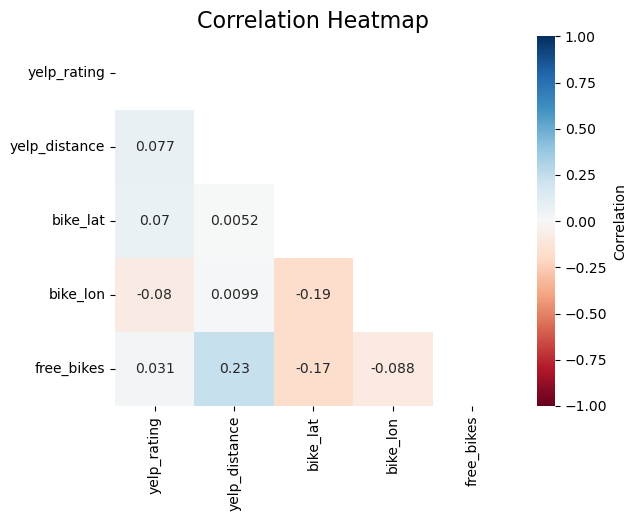

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# Ensure only relevant numeric columns are included
hr_columns = ['yelp_rating', 'yelp_distance', 'bike_lat', 'bike_lon', 'free_bikes']
yelp_numeric_df = yelp_df[hr_columns]  # Select only desired columns (and ensure they are numeric)

# Compute correlation matrix
corr = yelp_numeric_df.corr()

# Create a mask for the upper triangle (including diagonal)
mask = np.triu(np.ones_like(corr, dtype=bool), k=0)

# Use a diverging colormap (e.g., 'RdBu' with centered zero)
cmap = plt.colormaps['RdBu']
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)  # Ensures white maps to 0

# Generate the heatmap
ax = sns.heatmap(
    corr,
    annot=True,
    cmap=cmap,
    norm=norm,
    mask=mask,
    cbar_kws={'label': 'Correlation'}
)

# Title and styling
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


The above visualizations show only weak correlations between any of the columns in the dataframe, the strongest being a 0.23 correlation between the number of free bikes and the yelp_distance (the distance from the bike station to the POI).

### FourSquare EDA

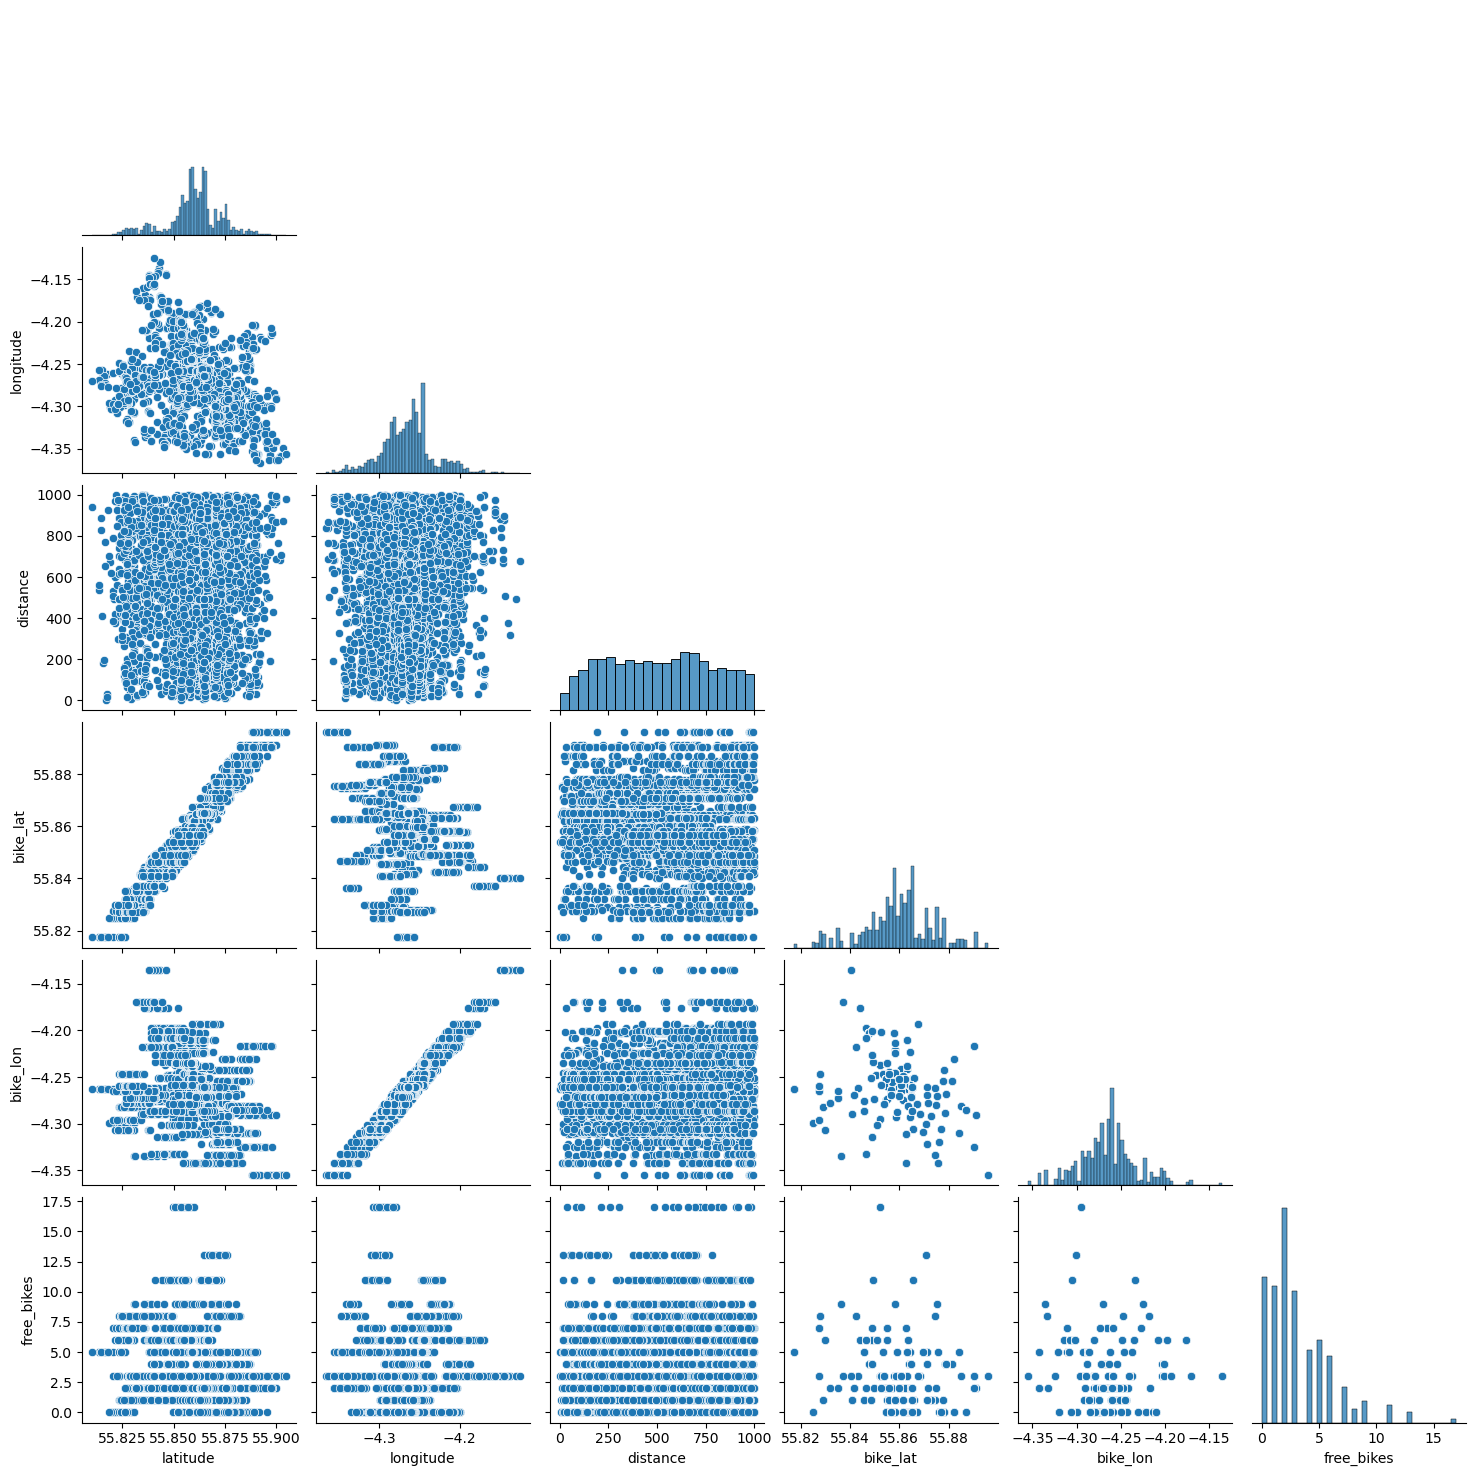

In [ ]:
# Creates a Seaborn pair plot, like above, but for FourSquare data
sns.pairplot(fs_df, corner=True)
plt.show()

As with the Yelp pairplot, there are no obvious relationships between the different features of the data. The bike station locations correlate with the POI place locations, but this is hardly unexpected.

In [36]:
fs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6168 entries, 0 to 6167
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fsq_category_id    6168 non-null   object 
 1   name               6168 non-null   object 
 2   short_name         6168 non-null   object 
 3   plural_name        6168 non-null   object 
 4   icon.prefix        6168 non-null   object 
 5   icon.suffix        6168 non-null   object 
 6   fsq_place_id       6168 non-null   object 
 7   latitude           6168 non-null   float64
 8   longitude          6168 non-null   float64
 9   distance           6168 non-null   int64  
 10  email              1727 non-null   object 
 11  link               6168 non-null   object 
 12  location.address   5399 non-null   object 
 13  location.locality  5741 non-null   object 
 14  bike_lat           6168 non-null   float64
 15  bike_lon           6168 non-null   float64
 16  bike_id            6168 

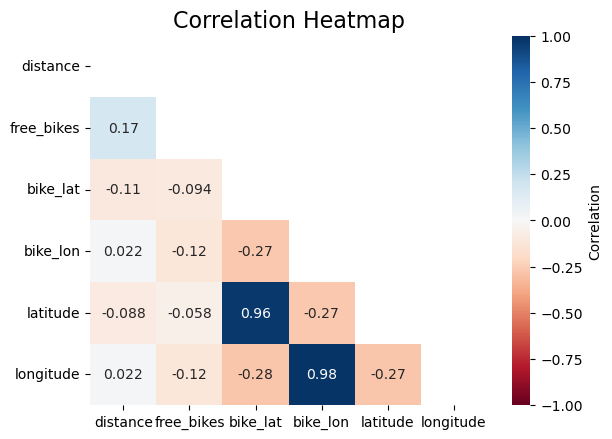

In [37]:
# Ensure only relevant numeric columns are included
hr_columns = ['distance','free_bikes','bike_lat','bike_lon','latitude','longitude']
fs_numeric_df = fs_df[hr_columns]  # Select only desired columns (and ensure they are numeric)

# Compute correlation matrix
corr = fs_numeric_df.corr()

# Create a mask for the upper triangle (including diagonal)
mask = np.triu(np.ones_like(corr, dtype=bool), k=0)

# Use a diverging colormap (e.g., 'RdBu' with centered zero)
cmap = plt.colormaps['RdBu']
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)  # Ensures white maps to 0

# Generate the heatmap
ax = sns.heatmap(
    corr,
    annot=True,
    cmap=cmap,
    norm=norm,
    mask=mask,
    cbar_kws={'label': 'Correlation'}
)

# Title and styling
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

The above Correlation Heatmap shows strong correlations between POI and bike station locations, which is hardly unexpected given that one was used to search for the other. Apart from that, there are only weak relationships between the other cells. 

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [23]:
import sqlite3
from sqlite3 import Error

# A function to create a connection to an SQLite database, given a path to a filename. 
# If the database doesn't already exist in that location, a new one is created.
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

connection = create_connection("../data/city_bikes.sqlite")

Connection to SQLite DB successful


In [ ]:
# This cell follows the pattern given in the "SQL in Python" walk through notes. 
# It is not needed when using the .to_sql() method in the following cell. 

# # Create tables from selected columns of the dataframes
# def execute_query(connection, query):
#     cursor = connection.cursor()
#     try:
#         cursor.execute(query)
#         connection.commit()
#         print("Query executed successfully")
#     except Error as e:
#         print(f"The error '{e}' occurred")

# create_city_bikes_table = """
# CREATE TABLE IF NOT EXISTS city_bikes (
#   id VARCHAR(255) PRIMARY KEY,
#   name TEXT NOT NULL,
#   latitude FLOAT,
#   longitude FLOAT,
#   free_bikes INTEGER,
#   empty_slots INTEGER
# );
# """

# create_fs_poi_table = """
# CREATE TABLE IF NOT EXISTS fs_poi (
#   fsq_place_id VARCHAR(255) PRIMARY KEY,
#   name TEXT NOT NULL,
#   latitude FLOAT,
#   longitude FLOAT,
#   bike_id VARCHAR(255),
#   distance INTEGER
# );
# """

# create_yelp_poi_table = """
# CREATE TABLE IF NOT EXISTS yelp_poi (
#   fsq_place_id VARCHAR(255) PRIMARY KEY,
#   name TEXT NOT NULL,
#   latitude FLOAT,
#   longitude FLOAT,
#   bike_id VARCHAR(255),
#   distance INTEGER,
#   yelp_rating FLOAT
# );
# """

# # Execute the queries for pre-defined connection
# execute_query(connection, create_city_bikes_table)
# execute_query(connection, create_fs_poi_table)
# execute_query(connection, create_yelp_poi_table)


In [32]:
# Insert city_bikes_df DataFrame into database as city_bikes table
city_bikes_df.to_sql(
    name='city_bikes',      # table name
    con=connection,         # database connection
    if_exists='replace',    # 'append', 'replace', or 'fail'
    index=False,            # don't insert DataFrame index
    method='multi'          # faster insertion for large datasets
)

# Insert fs_df DataFrame into database as fs_poi table
fs_df.to_sql(
    name='fs_poi',          # table name
    con=connection,         # database connection
    if_exists='replace',    # 'append', 'replace', or 'fail'
    index=False,            # don't insert DataFrame index
    method='multi'          # faster insertion for large datasets
)

# Insert yelp_poi DataFrame into database as yelp_poi table
yelp_df.to_sql(
    name='yelp_poi',        # table name
    con=connection,         # database connection
    if_exists='replace',    # 'append', 'replace', or 'fail'
    index=False,            # don't insert DataFrame index
    method='multi'          # faster insertion for large datasets
)


4164

### Look at the data before and after the join to validate your data.

In [28]:
# A function to run SQL read queries.
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [29]:
# Display the contents of the 'city_bikes' table.
select_users = "SELECT * from city_bikes"
users = execute_read_query(connection, select_users)

for user in users:
    print(user)

('066c99293af108ece27d9b0436c30cc4', 'Riverside Museum', 55.865683, -4.305367, '2025-07-01T19:18:19.376003+00:00Z', 11, 0, 19738176, 8416, 6, "['47041', '823506', '46976', '46961', '46910', '828228', '46562', '46530', '46501', '46409', '829967']", 0)
('0a106cbc148d5a0c2535b51c1dbe3b4d', 'Parkhead', 55.846524, -4.197475, '2025-07-01T19:18:19.377604+00:00Z', 6, 0, 150125231, 8470, 8, "['82316', '840047', '46722', '46457', '47968', '829955']", 0)
('0cc8c09950e1435ee7782478ed292fef', 'Tollcross International Swimming Centre', 55.84425, -4.176167, '2025-07-01T19:18:19.376951+00:00Z', 6, 0, 55599921, 8200, 6, "['828253', '46967', '823632', '828964', '823601', '829990']", 0)
('0e94d2ad012bff0cf23497963ff5fd77', 'Shields Road', 55.845807, -4.275232, '2025-07-01T19:18:19.375677+00:00Z', 1, 7, 7145152, 8403, 8, "['46992']", 0)
('101c6cd7749f373507e9444f5222b7f2', 'Shawlands Shopping Centre (Kilmarnock Road)', 55.829057, -4.282675, '2025-07-01T19:18:19.375152+00:00Z', 1, 6, 3812605, 8453, 8, "['4

In [ ]:
# Display the contents of the 'fs_poi' table.
select_fs_poi = "SELECT * from fs_poi"
users = execute_read_query(connection, select_fs_poi)

for user in users:
    print(user)

('4bf58dd8d48988d181941735', 'Museum', 'Museum', 'Museums', 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/museum_', '.png', '4c8a3ba4a92fa093be438fbf', 55.86539237825414, -4.3064174398355215, 73, 'museums@glasgowlife.org.uk', '/places/4c8a3ba4a92fa093be438fbf', 'Glasgow Harbour', 'Glasgow', 55.865683, -4.305367, '066c99293af108ece27d9b0436c30cc4', 11)
('4bf58dd8d48988d190941735', 'History Museum', 'History Museum', 'History Museums', 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/museum_history_', '.png', '4c8a3ba4a92fa093be438fbf', 55.86539237825414, -4.3064174398355215, 73, 'museums@glasgowlife.org.uk', '/places/4c8a3ba4a92fa093be438fbf', 'Glasgow Harbour', 'Glasgow', 55.865683, -4.305367, '066c99293af108ece27d9b0436c30cc4', 11)
('4bf58dd8d48988d16d941735', 'Café', 'Café', 'Cafés', 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', '.png', '4eaaa5f477c850207ed9fee8', 55.86560987402711, -4.305612237322065, 17, None, '/places/4eaaa5f477c850207ed9fee8', 'River

In [38]:
# Display the contents of the 'yelp_poi' table.
select_yelp_poi = "SELECT * from yelp_poi"
users = execute_read_query(connection, select_yelp_poi)

for user in users:
    print(user)

('tapasmallplates', 'Tapas/Small Plates', '_GHNOOJhhjLegiCvzf5V0Q', 'Ox And Finch', 4.7, 55.8656539706006, -4.28469195278264, '920 Sauchiehall Street', 'Glasgow', 1290.029875412091, 55.865683, -4.305367, '066c99293af108ece27d9b0436c30cc4', 11)
('scottish', 'Scottish', '_GHNOOJhhjLegiCvzf5V0Q', 'Ox And Finch', 4.7, 55.8656539706006, -4.28469195278264, '920 Sauchiehall Street', 'Glasgow', 1290.029875412091, 55.865683, -4.305367, '066c99293af108ece27d9b0436c30cc4', 11)
('british', 'British', 'jGLzc9eIUAnfto_5oZ8BMQ', 'Number 16 Restaurant', 4.6, 55.8708105, -4.2988387, '16 Byres Road', 'Glasgow', 700.6943353861723, 55.865683, -4.305367, '066c99293af108ece27d9b0436c30cc4', 11)
('bars', 'Bars', 'rmaH1My396rCYEnL8XQtPg', 'Ubiquitous Chip', 4.3, 55.8749146052102, -4.29324745449333, '8-12 Ashton Lane', 'Glasgow', 1274.9203325434953, 55.865683, -4.305367, '066c99293af108ece27d9b0436c30cc4', 11)
('scottish', 'Scottish', 'rmaH1My396rCYEnL8XQtPg', 'Ubiquitous Chip', 4.3, 55.8749146052102, -4.29324